<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.shape

(768, 9)

In [6]:
#768 rows and 9 columns ...check columns

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#check for missing values

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#no missing values

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#no need for Encoding

In [13]:
y=data['Outcome']
x=data[['Pregnancies','Age','Insulin','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction']]

In [14]:
#Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mn=MinMaxScaler()

In [18]:
x.loc[:,['Pregnancies','Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]=mn.fit_transform(x[['Pregnancies','Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']])

In [19]:
x.head()

,Pregnancies,Age,Age,Insulin,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction
0,0.352941,0.483333,0.483333,0.000000,0.743719,0.590164,0.353535,0.500745,0.627
1,0.058824,0.166667,0.166667,0.000000,0.427136,0.540984,0.292929,0.396423,0.351
2,0.470588,0.183333,0.183333,0.000000,0.919598,0.524590,0.000000,0.347243,0.672
3,0.058824,0.000000,0.000000,0.111111,0.447236,0.540984,0.232323,0.418778,0.167
4,0.000000,0.200000,0.200000,0.198582,0.688442,0.327869,0.353535,0.642325,2.288


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=16)

In [22]:
#Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression()

In [24]:
lg_reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=lg_reg.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [27]:
accuracy_score(y_test,y_pred)

0.8177083333333334

In [28]:
confusion_matrix(y_test,y_pred)

array([[118,   7],
       [ 28,  39]])

In [29]:
precision_score(y_test,y_pred)

0.8478260869565217

In [31]:
recall_score(y_test,y_pred)

0.582089552238806

In [32]:
f1_score(y_test,y_pred)

0.6902654867256638

In [33]:
#KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
metric_k=[]#empty list created
neighbors=np.arange(3,14)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [36]:
metric_k

[0.8020833333333334,
 0.7864583333333334,
 0.7916666666666666,
 0.78125,
 0.8020833333333334,
 0.7604166666666666,
 0.7604166666666666,
 0.7864583333333334,
 0.7864583333333334,
 0.78125,
 0.7916666666666666]

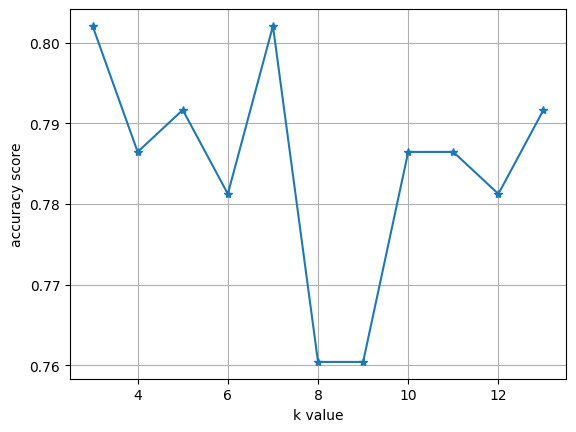

In [37]:
plt.plot(neighbors,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

In [38]:
#k=1 or 7

In [39]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
y_pred_knn=classifier.predict(x_test)

In [41]:
confusion_matrix(y_test,y_pred_knn)

array([[112,  13],
       [ 25,  42]])

In [42]:
accuracy_score(y_test,y_pred_knn)

0.8020833333333334

In [43]:
precision_score(y_test,y_pred_knn)

0.7636363636363637

In [44]:
recall_score(y_test,y_pred_knn)

0.6268656716417911

In [46]:
f1_score(y_test,y_pred_knn)

0.6885245901639345

In [ ]:
#SVM

In [47]:
from sklearn.svm import SVC

In [48]:
sv=SVC(kernel='linear')

In [49]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
y_pred_svc=sv.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred_svc)

0.8229166666666666

In [52]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [53]:
confusion_matrix(y_test,y_pred_svc)

array([[118,   7],
       [ 27,  40]])

In [54]:
recall_score(y_test,y_pred_svc)

0.5970149253731343

In [55]:
f1_score(y_test,y_pred_svc)

0.7017543859649124

In [56]:
sv1=SVC(kernel='poly',degree=2)

In [57]:
sv1.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [58]:
y_pred_svc_1=sv1.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_svc_1)

0.796875

In [60]:
confusion_matrix(y_test,y_pred_svc_1)

array([[115,  10],
       [ 29,  38]])

In [61]:
sv2=SVC(kernel='rbf')

In [62]:
sv2.fit(x_train,y_train)

SVC()

In [63]:
y_pred_svc_2=sv2.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred_svc_2)

0.8072916666666666

In [65]:
confusion_matrix(y_test,y_pred_svc_2)

array([[116,   9],
       [ 28,  39]])

In [ ]:
#Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [67]:
y_pred_gnb=gnb.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred_gnb)

0.796875

In [69]:
confusion_matrix(y_test,y_pred_gnb)

array([[107,  18],
       [ 21,  46]])